<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **数据生成器**

In [ ]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn,optim
from torch.utils.data import Dataset,TensorDataset,DataLoader

**一、回归类数据集创建方法(特征和标签都是连续值)**

In [ ]:
num_inputs = 2 # 特征数目
num_examples = 1000 # 样本数目

In [ ]:
torch.manual_seed(420)
w_true = torch.tensor([2,-1],dtype=torch.float32).reshape(-1,1)
b_true = torch.tensor([1],dtype=torch.float32)
features = torch.randn(num_examples,num_inputs)
labels_true = torch.mm(features,w_true) + b_true
labels = labels_true + torch.randn(size=labels_true.shape)*0.01

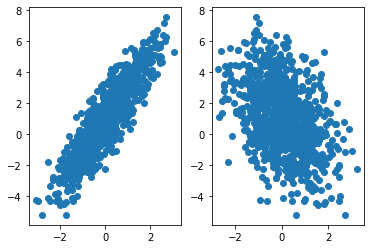

In [ ]:
plt.subplot(121) # 1行2列的图中的第一个子图
plt.scatter(features[:,0],labels)
plt.subplot(122) # 1行2列的图中的第二个子图
plt.scatter(features[:,1],labels);

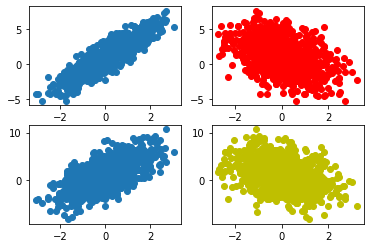

In [ ]:
torch.manual_seed(420)
labels1 = labels_true + torch.randn(size=labels_true.shape)* 2
plt.subplot(221)
plt.scatter(features[:,0],labels)
plt.subplot(222)
plt.plot(features[:,1],labels,'ro')
plt.subplot(223)
plt.scatter(features[:,0],labels1)
plt.subplot(224)
plt.plot(features[:,1],labels1,'yo')

**创建生成回归类数据的函数**

In [ ]:
def tensorGenReg(num_examples,w,bias,delta,deg):
  """回归类数据创建函数
  ：param num_examples:创建数据集的样本数
  ：param w:特征系数
  ：param bias:是否需要截距
  ：param delta：扰动项取值
  ：param deg：方程次数
  """
  if bias == True:
    num_inputs = len(w)-1
    features_true = torch.randn(num_examples,num_inputs)
    w_true = torch.tensor(w[:-1],dtype=torch.float32).reshape(-1,1)
    b_true = torch.tensor(w[-1],dtype=torch.float32)
    if num_inputs == 1:
      labels_true = torch.pow(features_true,deg)*w_true + b_true
    else:
      labels_true = torch.mm(torch.pow(features_true,deg),w_true) + b_true
    features = torch.cat((features_true,torch.ones(len(features_true),1)),1)
    labels = labels_true + torch.randn(size=labels_true.shape)*delta
  else:
    num_inputs = len(w)
    features_true = torch.randn(num_examples,num_inputs)
    w_true = torch.tensor(w,dtype=torch.float32).reshape(-1,1)
    if num_inputs == 1:
      labels_true = torch.pow(features_true,deg)*w_true
    else:
      labels_true = torch.mm(torch.pow(features_true,deg),w_true)
    features = features_true
    labels = labels_true + torch.randn(size=labels_true.shape)*delta
  return features,labels


In [ ]:
num_examples=5000
w = [2,1,-2,5]
bias = False
delta = 0.01
deg = 2

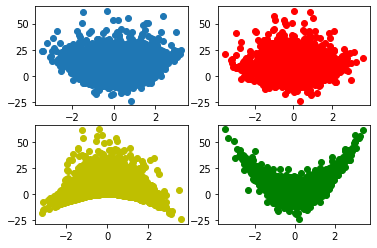

In [ ]:

torch.manual_seed(420)
features,labels = tensorGenReg(num_examples=num_examples,w=w,bias=bias,delta=delta,deg=deg)
plt.subplot(221)
plt.scatter(features[:,0],labels)
plt.subplot(222)
plt.plot(features[:,1],labels,"ro")
plt.subplot(223)
plt.plot(features[:,2],labels,"yo")
plt.subplot(224)
plt.plot(features[:,3],labels,"go");

**二、分类数据集的创建(分类模型数据的标签为离散型)**

In [ ]:
torch.randn(4,2) # 均值为0，方差为1的正态分布

tensor([[ 0.1106,  1.0624],
        [-0.1527,  2.0326],
        [ 0.1713, -0.7827],
        [-0.5330,  1.1064]])

In [ ]:
torch.normal(4,2,size=(4,2)) # 第一个参数为均值，第二个参数为标准差

tensor([[3.0555, 6.6574],
        [4.9405, 3.5698],
        [2.2443, 4.0649],
        [2.9117, 2.4660]])

**创建两个特征的三分类数据集，每个类别包含500个样本，第一个类别两个特征符合均值4，标准差2的正态分布；第二个类别两个特征符合均值-2，标准差为2的正态分布；第三个类别两个特征符合均值-6，标准差2的正态分布**

In [ ]:
torch.manual_seed(420)
num_inputs = 2
num_examples = 500
# 创建自变量簇
data0 = torch.normal(4,2,size=(num_examples,num_inputs),dtype=torch.float32)
data1 = torch.normal(-2,2,size=(num_examples,num_inputs),dtype=torch.float32)
data2 = torch.normal(-6,2,size=(num_examples,num_inputs),dtype=torch.float32)
# 创建标签
label0 = torch.zeros(num_examples)
label1 = torch.ones(num_examples)
label2 = torch.full_like(label1,2) # 创建和label1形状相同的张量
# 合并形成数据集
features = torch.cat((data0,data1,data2))
labels = torch.cat((label0,label1,label2)).long().reshape(-1,1)

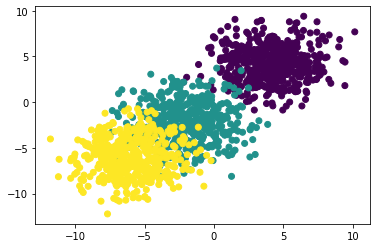

In [ ]:
plt.scatter(features[:,0],features[:,1],c=labels); # 有单独的参数进行区分，用scatter(分类型)

In [ ]:
torch.manual_seed(420)
torch.manual_seed(420)
num_inputs = 2
num_examples = 500
# 创建自变量簇
data0 = torch.normal(3,10,size=(num_examples,num_inputs),dtype=torch.float32)
data1 = torch.normal(0,5,size=(num_examples,num_inputs),dtype=torch.float32)
data2 = torch.normal(-3,10,size=(num_examples,num_inputs),dtype=torch.float32)
# 创建标签
label0 = torch.zeros(num_examples)
label1 = torch.ones(num_examples)
label2 = torch.full_like(label1,2) # 创建和label1形状相同的张量
# 合并形成数据集
features1 = torch.cat((data0,data1,data2))
labels1 = torch.cat((label0,label1,label2)).long().reshape(-1,1)

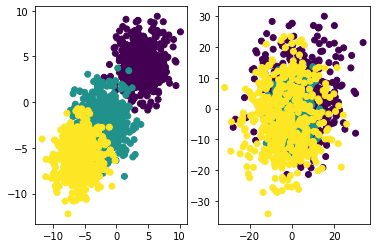

In [ ]:
plt.subplot(121)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.subplot(122)
plt.scatter(features1[:,0],features1[:,1],c=labels1);

**创建生成分类数据的函数**

In [ ]:
def tensorGenCla(num_examples=500,num_inputs=2,num_classes=3,deg_dispersion=[4,2],bias=False):
  """分类数据集创建函数
  ：param num_examples：每个类别的数据数量
  ：param num_inputs; 数据集特征数量
  ：param num_classes：数据集类别总数
  ：param deg_dispersion：数据分布离散程度参数，需要输入一个列表，其中第一个参数表示每个类别的均值，第二个参数表示随机数组的标准差
  ：param bias：建立模型逻辑回归模型是是否带入截距
  ：return：生成特征张量和标签张量，其中特征张量是浮点型二维数据，标签张量是长整型二维数组
  """
  cluster_1 = torch.empty(num_examples,1)
  mean_ = deg_dispersion[0]
  std_ = deg_dispersion[1]
  lf = []
  ll = []
  k = mean_*(num_classes+1)/2

  for i in range(num_classes):
    data = torch.normal(i*mean_-k,std_,size=(num_examples,num_inputs),dtype=torch.float32)
    lf.append(data)
    labels_temp = torch.full_like(cluster_1,i)
    ll.append(labels_temp)
  features = torch.cat(lf)
  labels = torch.cat(ll).long()
  if bias == True:
    features = torch.cat((features,torch.ones(len(features),1)),1)
  return features,labels

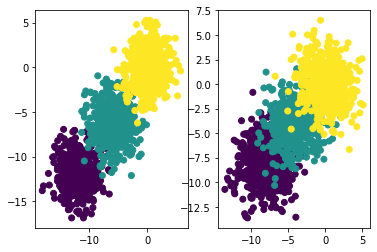

In [ ]:
torch.manual_seed(420)
f,l = tensorGenCla(deg_dispersion = [6,2])
f1,l1 = tensorGenCla(deg_dispersion = [4,2])
plt.subplot(121)
plt.scatter(f[:,0],f[:,1],c=l)
plt.subplot(122)
plt.scatter(f1[:,0],f1[:,1],c=l1);

**三、创建小批量切分函数**

In [ ]:
l = list(range(5))
l

[0, 1, 2, 3, 4]

In [ ]:
random.shuffle(l) # shuffle只能对有序的对象进行打乱
l

[1, 3, 2, 0, 4]

In [ ]:
torch.manual_seed(420)
features,labels = tensorGenCla()

In [ ]:
def data_iter(batch_size,features,labels):
  """数据切分函数
  ：param batch_size：每个子数据集包含多少数据
  ：param features：输入的特征张量
  ：param labels：输入的标签张量
  ：return l ：包含batch_size个列表，每个列表切分后的特征和标签所组成
  """

  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  l = []
  for i in range(0,num_examples,batch_size):
    j = torch.tensor(indices[i:min(i+batch_size,num_examples)])
    l.append([torch.index_select(features,0,j),torch.index_select(labels,0,j)])
  return l

In [ ]:
l = data_iter(10,features,labels)
l[0]

[tensor([[  2.6094,  -0.1293],
         [ -1.1649,  -2.6696],
         [ -7.2887,  -9.1252],
         [  2.7276,  -1.8229],
         [ -1.2697,  -0.5765],
         [ -5.5347,  -7.6768],
         [ -3.6981,  -4.6592],
         [ -2.2548,   3.2658],
         [ -7.3893, -10.7220],
         [  0.3293,  -1.9252]]), tensor([[2],
         [2],
         [0],
         [2],
         [1],
         [0],
         [0],
         [2],
         [0],
         [2]])]

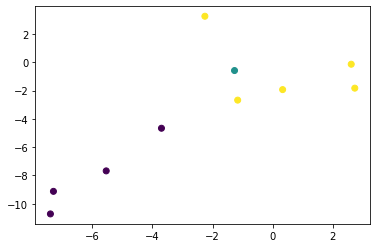

In [ ]:
plt.scatter(l[0][0][:,0],l[0][0][:,1],c=l[0][1]);